# MLOPS project - Exploratory analysis

Author : **Nicolas Deronsart**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

## First exploratory analysis

Before trying to train a model to predict the polarity of a movie review, we will first try to explore the training dataset to see what we have to work with.

In [2]:
df = pd.read_csv('../data/train.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,film-url,review,polarity
0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,0
1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",0
3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",1
...,...,...,...
159995,http://www.allocine.fr/film/fichefilm-132387/c...,Un rythme bien trop lent et un Ashton Kutcher ...,0
159996,http://www.allocine.fr/film/fichefilm-53313/cr...,Monsieur Duchovny vous êtes aussi piètre acteu...,0
159997,http://www.allocine.fr/film/fichefilm-248258/c...,Complètement différent des films de la série C...,1
159998,http://www.allocine.fr/film/fichefilm-268731/c...,Alors franchement pour le moment c'est le meil...,1


In [3]:
df.describe(include='all')

,film-url,review,polarity
count,160000,160000,160000.000000
unique,30030,159461,NaN
top,http://www.allocine.fr/film/fichefilm-233486/c...,Que dire de ce film sans aucun interet ? Absol...,NaN
freq,29,27,NaN
mean,NaN,NaN,0.503669
std,NaN,NaN,0.499988
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,1.000000
75%,NaN,NaN,1.000000


The dataset contains 160000 rows of 3 columns: `film_url`, `review` and `polarity`.  
The polarity can be 0 or 1 and corresponds to the target value. There is a mean of 0.5, so the dataset should be balanced.  
We can see that some reviews (at least one) appear several times in the dataset.  
The movie that has the most reviews is the one at the url https://www.allocine.fr/film/fichefilm-233486/critiques/spectateurs/ with 29 reviews.

In [4]:
df.isna().sum()

film-url    0
review      0
polarity    0
dtype: int64

In [5]:
df[df['review'] == '']

,film-url,review,polarity


It looks like there are no missing values in the dataset.

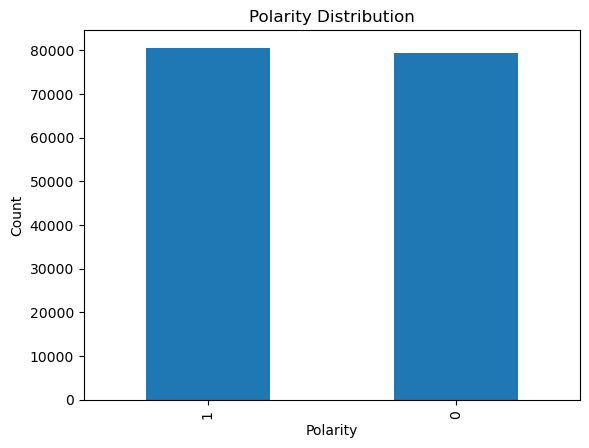

polarity
1    80587
0    79413
Name: count, dtype: int64

In [6]:
df['polarity'].value_counts().plot(kind='bar')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')
plt.show()
df['polarity'].value_counts()

We can also see that the dataset is balanced, with 80587 elements rated 1 and 79413 elements rated 0.

In [7]:
df[df.duplicated()]

,film-url,review,polarity
5072,http://www.allocine.fr/film/fichefilm-38708/cr...,"trés moyen comme film, un top gun version cais...",0
6666,http://www.allocine.fr/film/fichefilm-11708/cr...,"De Funes est un de mes acteur préférés , c'est...",1
15363,http://www.allocine.fr/film/fichefilm-1824/cri...,"superbe film , un polar béton et en plus avec ...",1
17111,http://www.allocine.fr/film/fichefilm-23980/cr...,mon dieu quelle niaiserie c'est l’histoire d'u...,0
17736,http://www.allocine.fr/film/fichefilm-11761/cr...,Gary Oldamn est saisissant de ressemblance ave...,1
...,...,...,...
159320,http://www.allocine.fr/film/fichefilm-34537/cr...,les armes fatales sont tellement minables ridi...,1
159413,http://www.allocine.fr/film/fichefilm-16463/cr...,le personnage de Jeff Bridges est hilarant ce ...,1
159577,http://www.allocine.fr/film/fichefilm-56289/cr...,"Un film qui défonce, au propre comme au figuré.",1
159604,http://www.allocine.fr/film/fichefilm-14046/cr...,Quel film! Impossible de sortir indemne après ...,1


There are 281 duplicates in the dataset.